In [1]:
import pandas as pd

For visualizations:

In [232]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px
import ipywidgets as widgets
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company does an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators mark whether the recommendation met the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**).

See a sample below:

ad_recs_annotated = pd.read_csv('data/ad_annotations.csv')
ad_recs_annotated.sample(5)

In [3]:
ad_recs_annotated = pd.read_csv('data/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
183970,2021-week_45,AD078X8PPG,Tab Solutions,US,no,True,Qality,RNNQ
133642,2021-week_42,AD00ECTVR8,RelayFoods,GB,yes,NaN,Qality,DNNQ
369883,2022-week_52,AD08DFK6PJ,Extreme DA,US,yes,NaN,Yield,DNNY
314583,2022-week_03,AD098X8W88,Extreme DA,US,yes,NaN,Yield,RuleBasedY
255410,2021-week_50,AD08S7QQXC,Fancy,US,yes,NaN,Qality,DNNQ


In [4]:
df = ad_recs_annotated.copy()
df.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
273606,2022-week_01,AD08N88AR0,Search Million Culture,DE,yes,NaN,Qality,DNNQ
272966,2022-week_01,AD08D7LQG8,Search Million Culture,DE,yes,NaN,Qality,DNNQ
320157,2022-week_04,AD08Z88P98,RelayFoods,GB,yes,NaN,Qality,DNNQ
229841,2021-week_48,AD098SY8CP,Extreme DA,US,yes,NaN,Yield,UserPopY
212160,2021-week_47,AD08LZFTS8,Extreme DA,US,yes,NaN,Yield,DNNY


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column

In [5]:
df.shape

(373788, 8)

#### 1. Adding a column with the sample's year

In [6]:
df['year'] = df.week_id.apply(lambda x: int(x[:4]))
df.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year
329408,2022-week_05,AD078YX87Y,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2022
336054,2022-week_05,AD0998NJR8,Puentes Company,IN,no,True,Yield,UserPopY,2022
351326,2022-week_06,AD087VOMJ6,Search Million Culture,IN,yes,NaN,Qality,ManualQ,2022
192255,2021-week_46,AD078X8WPS,Search Million Culture,GB,yes,NaN,Qality,DNNQ,2021
145999,2021-week_43,AD00008AWO,RelayFoods,DE,yes,NaN,Qality,UserPopQ,2021


#### 2. Adding a column with the sample quarter

In [7]:
# creating quarters bounds and defining a function to select the suitable quarter:

for i in range(5):
    globals()['Q%s_upper_bound' % i] = 52 / 4 * i

def select_quarter(num):
    if num < Q1_upper_bound:
        quarter = 1
    elif num > Q3_upper_bound:
        quarter = 4
    elif num < Q2_upper_bound:
        quarter = 2
    else:
        quarter = 3
    return quarter

In [8]:
week_num_lst = df.week_id.apply(lambda x: int(x[-2:]))
df['Quarter'] = week_num_lst.apply(select_quarter)
df.sample(10)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,Quarter
98893,2021-week_39,AD07T8WY8V,Fancy,US,yes,NaN,Qality,DNNQ,2021,3
371222,2022-week_52,AD09R7M8PR,Extreme DA,US,no,False,Yield,RuleBasedY,2022,4
100674,2021-week_40,AD08V8GGGK,Fry Multimedia,DE,yes,NaN,Qality,DNNQ,2021,4
254098,2021-week_50,AD08MA8WIM,RelayFoods,JP,no,True,Qality,UserPopQ,2021,4
198344,2021-week_46,AD088R8DFL,Extreme DA,US,yes,NaN,Yield,RNNY,2021,4
96119,2021-week_39,AD07THMMYV,Search Million Culture,JP,no,True,Qality,DNNQ,2021,3
133632,2021-week_42,AD0088NHN0,Fancy,GB,yes,NaN,Qality,XGBQ,2021,4
10301,2021-week_33,AD00JA888W,Search Million Culture,JP,yes,NaN,Qality,UserPopQ,2021,3
136116,2021-week_42,AD07Q8QV8D,Search Million Culture,IN,yes,NaN,Qality,ManualQ,2021,4
43749,2021-week_36,AD077P8LVJ,Modanisa,DE,no,True,Qality,DNNQ,2021,3


#### 3. Add a new success column with values 1 and 0 for yes and no

In [9]:
df.is_success.value_counts()

yes    304206
no      69582
Name: is_success, dtype: int64

In [10]:
df['success'] = df.is_success.apply(lambda x: 1 if x == 'yes' else 0)
df.success.value_counts()

1    304206
0     69582
Name: success, dtype: int64

#### 4. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs:

In [11]:
# How many NaNs there are in column 'is_sever':
df.is_sever.value_counts(dropna = False)[0]

# Onother way of doing it:
df[df.is_sever.isnull()].shape[0]

304195

In [12]:
df['sever'] = df.is_sever.apply(lambda x: True if x == True else False)
df.sever.value_counts(dropna = False)

False    329099
True      44689
Name: sever, dtype: int64

#### 5. Capitlize (first letter only) the is_success column:

In [13]:
df.is_success = df.is_success.apply(lambda x: x.lower().capitalize())
df.is_success.value_counts()

Yes    304206
No      69582
Name: is_success, dtype: int64

### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DDNQ, RRNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

#### 1. How many requests are there in US region? 

In [14]:
df[df.region == 'US'].shape[0]

103846

In [15]:
df.query('region == "US"').shape[0]

103846

#### 2. How many **successful** requests are there in US region? 

In [16]:
df[(df.region == 'US') &
   (df.success == 1)].shape[0]

88918

In [17]:
df.query('region == "US" and success == 1').shape[0]

88918

#### 3. How many **successful** requests are there in US region, on week 52?

In [18]:
df[(df.region == 'US') &
   (df.success == 1) &
   (df.week_id == '2022-week_52')].shape[0]

3342

In [19]:
df.query("region == 'US' and success == 1 and week_id == '2022-week_52'").shape[0]

3342

#### 4. How many requests where delivered by DNNQ, RNNY and UserPopQ together?

In [20]:
df[(df.rec_provider == 'DNNQ') |
   (df.rec_provider == 'RNNY') |
   (df.rec_provider == 'UserPopQ')].shape[0]

200093

In [21]:
df.query('rec_provider == ["DNNQ", "RNNY", "UserPopQ"]').shape[0]

200093

#### 5. How many requests where delivered by rule based providers? (RuleBased and RuleBasedY)

In [22]:
df[(df.rec_provider == 'RuleBasedY') |
   (df.rec_provider == 'RuleBased')].shape[0]

28336

In [23]:
df.query('rec_provider == ["RuleBasedY", "RuleBased"]').shape[0]

28336

In [24]:
# Yarden
df[df.rec_provider.str.contains('RuleBased', regex=False)].shape[0]

28336

#### 6. Select only the requests from 2021 - How many are there?

In [25]:
df[df.year == 2021].shape[0]

271615

In [26]:
df.query("year == 2021").shape[0]

271615

#### 7. Select the reqeusts from week 30 to week 40 - How many are there? 

In [27]:
df['week'] = df.week_id.apply(lambda x: int(x[-2:]))

In [28]:
df[(df.week <= 40) &
   (df.week >= 30)].shape[0]

115051

In [29]:
df.query("week >= 30 and week <= 40").shape[0]

115051

#### 8. Select all the data that comes from the most popular Ad

In [30]:
the_most_popular_ad = df.ad_id.value_counts().idxmax()
df[df.ad_id == the_most_popular_ad].head()

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,Quarter,success,sever,week
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False,33
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False,33
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False,34
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False,34
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False,35


In [31]:
# df.query("ad_id == the_most_popular_ad")
df.query("ad_id == @the_most_popular_ad").head()

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,Quarter,success,sever,week
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False,33
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False,33
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False,34
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False,34
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False,35


#### 9. Select all the data that comes from the least popular provider

In [32]:
the_least_popular_provider = df.rec_provider.value_counts().index[-1]
df[df.rec_provider == the_least_popular_provider].head()

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,Quarter,success,sever,week
352263,2022-week_06,AD0088UP8R,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False,6
352326,2022-week_06,AD09C8KC8Z,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False,6
352578,2022-week_06,AD078DT6GJ,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False,6
352595,2022-week_06,AD09C8P789,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False,6
352703,2022-week_06,AD00UF8VOF,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False,6


In [33]:
# df.query("rec_provider == {the_least_popular_provider}")
df.query("rec_provider == @the_least_popular_provider").head()

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,Quarter,success,sever,week
352263,2022-week_06,AD0088UP8R,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False,6
352326,2022-week_06,AD09C8KC8Z,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False,6
352578,2022-week_06,AD078DT6GJ,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False,6
352595,2022-week_06,AD09C8P789,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False,6
352703,2022-week_06,AD00UF8VOF,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False,6


#### 10. Select the data in which is_sever is None. How big is it? 

In [34]:
df[df.is_sever.isnull()].shape[0]

304195

In [35]:
# df.query("is_sever == None").shape[0]

#### 11. Select the data in which the requester is a 3 word company

In [36]:
def is_three_words(text):
    splited_text = text.split(" ")
    return True if len(splited_text) == 3 else False

In [37]:
df[df.requester.apply(is_three_words)].head()

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,Quarter,success,sever,week
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False,33
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1,False,33
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False,33
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False,33
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False,33


In [38]:
df[df['requester'].apply(lambda x: len(x.split()))==3].shape[0]

118141

#### 12. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it

In [39]:
def split_string_to_obejects_list(string):
    return [objct for objct in string]

def is_six_letters(text):
    count = 0
    for i in split_string_to_obejects_list(text):
        if i.isalpha():
            count = count + 1
    return True if count == 6 else False

In [40]:
df[df.requester.apply(is_three_words)][df.ad_id.apply(is_six_letters)].shape[0]

/var/folders/7_/rd00750d2c32fj3338594q200000gp/T/ipykernel_979/3732270017.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



38390

In [41]:
df.ad_id.apply(len).value_counts()

10    366890
9       6535
8        350
7         13
Name: ad_id, dtype: int64

#### 13. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

In [42]:
# def identify_numbers(text):
#     nums = [int(number) for number in range(10)]
#     numbers_list = []
#     for i in text:
#         try:
#             if int(i) in nums:
#         except ValueError:
#             continue
#         else:
#             numbers_list.append(int(i))
#     return numbers_list

# def multiplication(text):
#     from functools import reduce
#     numbers_list = identify_numbers(text)
#     multiplication_result = reduce(lambda x,y: x*y, numbers_list)
#     return True if multiplication_result > 30 else False

In [154]:
# df[df.ad_id.apply(multiplication)]

### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

#### 1. How many weeks available in the data? Are there any missing weeks?

In [44]:
print(f"{df.week_id.nunique()} weeks are avaliable in the data.")

26 weeks are avaliable in the data.


In [45]:
def missing_weeks(mylist):
    miss_weeks = []
    full_list = [i for i in range(1,53)]
    for week_num in full_list:
        if not week_num in mylist:
            miss_weeks.append(week_num)
    return miss_weeks

weeks_list = df.week.unique().tolist()

missing_weeks(weeks_list)

[7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

#### 2. How many regions available in the data? Are there any missing weeks per region? 

In [46]:
print(f"The data contains {df.region.nunique()} different regions.")

The data contains 5 different regions.


In [47]:
regions = df.region.unique().tolist()
mylist = []
for region in regions:
    x = missing_weeks(df.query('region == @region').week.unique().tolist())
    mylist.append((region, x))
result = pd.DataFrame(mylist,
                      columns = ['Region', 'Missing Weeks'])
result

,Region,Missing Weeks
0,DE,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ..."
1,GB,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ..."
2,IN,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ..."
3,JP,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ..."
4,US,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ..."


#### 3. How many ads are being sent to annotation in each region per week?

In [48]:
df.groupby(['region','week']).ad_id.count().reset_index()

,region,week,ad_id
0,DE,1,2402
1,DE,2,2394
2,DE,3,2378
3,DE,4,2365
4,DE,5,2382
...,...,...,...
124,US,48,4010
125,US,49,3994
126,US,50,3991
127,US,51,3996


#### 4. How many None values are there in is_sever column?

In [49]:
# df.is_sever.value_counts(dropna = False)[0]
df[df.is_sever.isnull()].shape[0]

304195

#### 5. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)

In [50]:
# a = 0
# for ad in Ads_list:
#     for week in weeks_list:
#         b = df.query('ad_id == @ad and week ==@week').shape[0]
#         if b > a:
#             a = b
#             the_most_sent_ad = ad
#             relevant_week = week
# print(f'Ad {the_most_sent_ad} were sent {a} times in week {relevant_week}')

# a = df.groupby(['ad_id', 'week']).agg({'ad_id':'count'})
# a.sort_values(by = 'week', ascending = False)

In [51]:
counting_ads_per_week = df.groupby('week').ad_id.value_counts()
counting_ads_per_week = counting_ads_per_week.sort_values(ascending = False)
counting_ads_per_week.head(1)

week  ad_id     
40    AD098SWYF6    81
Name: ad_id, dtype: int64

#### 6. there ads that are being sent in more than one week?
##### 6.1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
##### 6.2. What are the weeks that the ad from above was sent in? 
##### 6.3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.

In [52]:
# 6.1

df.groupby(['week']).ad_id.value_counts().idxmax(), df.groupby(['week']).ad_id.value_counts().max()

((40, 'AD098SWYF6'), 81)

In [53]:
# 6.2

pop_ad = df.groupby(['week']).ad_id.value_counts().idxmax()[1]
df[df.ad_id == pop_ad].week.unique()

array([33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51,  1,  2,  3,  4,  5,  6, 52])

In [54]:
# 6.3
# df[(df.success == 1) & (df.sever == True)].ad_id.value_counts()

In [55]:
# strange_ad = df[(df.success == 1) & (df.sever == True)].ad_id.value_counts().idxmax()
# df.query('ad_id == @strange_ad and success == 1 and sever == True')

In [56]:
# df.groupby(['ad_id', 'is_success']).week.unique().reset_index()

#### 7. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 

In [57]:
df[(df.is_sever.isna()) & (df.success == 1)].shape[0]

304189

In [58]:
df[df.success == 0].shape[0]

69582

In [59]:
df[(df.is_sever.isna()) & (df.success == 1)].shape[0] + df[df.success == 0].shape[0], df.shape[0]

(373771, 373788)

Answer: It seems that the success and sever are two ALTERNATIV fetures.

#### 8. Per each region, What is the Quality/Yield traffic proportion WoW?

In [60]:
rec_type_prop_per_week_and_region = df.groupby(['region', 'week_id']).recommendation_type.value_counts() / df.groupby(['region', 'week_id']).recommendation_type.count()
rec_type_prop_per_week_and_region = rec_type_prop_per_week_and_region.reset_index(name = 'proportion')
rec_type_prop_per_week_and_region

,region,week_id,recommendation_type,proportion
0,DE,2021-week_33,Qality,0.796660
1,DE,2021-week_33,Yield,0.203340
2,DE,2021-week_34,Qality,0.836864
3,DE,2021-week_34,Yield,0.163136
4,DE,2021-week_35,Qality,0.773088
...,...,...,...,...
253,US,2022-week_05,Qality,0.348924
254,US,2022-week_06,Yield,0.632014
255,US,2022-week_06,Qality,0.367986
256,US,2022-week_52,Yield,0.675088


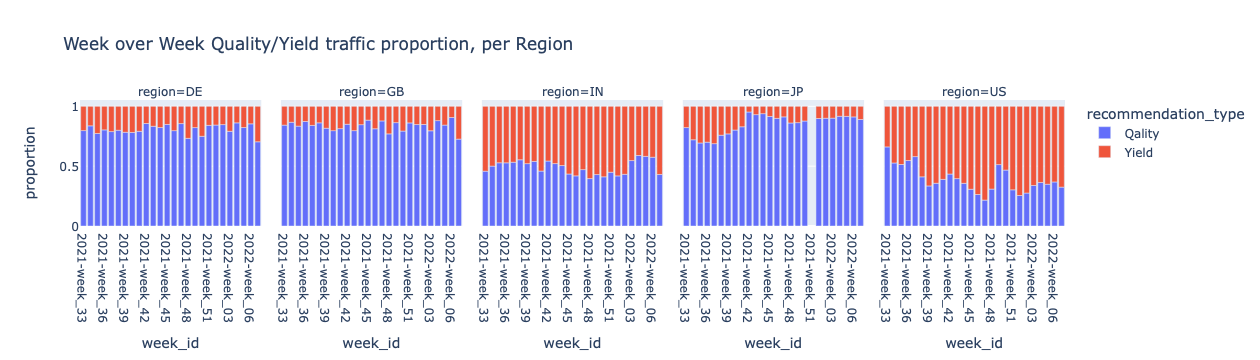

In [222]:
fig41 = px.bar(rec_type_prop_per_week_and_region, x = 'week_id', y = 'proportion',facet_col = 'region', category_orders = {'region' : ['DE', 'GB', 'IN', 'JP', 'US']}, color = 'recommendation_type', title = " Week over Week Quality/Yield traffic proportion, per Region")
fig41.show()

In [73]:
@widgets.interact
def show_fig41(region = widgets.SelectionSlider(options = ['DE', 'GB', 'IN', 'JP', 'US'])):
    df = rec_type_prop_per_week_and_region.query('region == @region')
    return px.bar(df, x = 'week_id', y = 'proportion',facet_col = 'region', color = 'recommendation_type', title = f" Week over Week Quality/Yield traffic proportion, for {region}.")

interactive(children=(SelectionSlider(description='region', options=('DE', 'GB', 'IN', 'JP', 'US'), value='DE'…

#### 9. How many different reqeusters are there?

In [62]:
df.requester.nunique()

36

#### 10. Which are the top 5 requesters per region?

In [63]:
df.groupby(['region']).apply(lambda grp: grp.requester.value_counts().head())

region                        
DE      Search Million Culture    23657
        RelayFoods                17313
        MoJoe Brewing Company      8616
        iDreamsky Technology       3542
        SOLOMO365                  2435
GB      Search Million Culture    28002
        RelayFoods                15920
        Fancy                     13678
        MoJoe Brewing Company      9530
        iDreamsky Technology       3919
IN      Puentes Company           29427
        Search Million Culture    21365
        RelayFoods                17352
        MoJoe Brewing Company      7191
        iDreamsky Technology       1995
JP      RelayFoods                24574
        Search Million Culture     7906
        MoJoe Brewing Company      3549
        LocalVox Media             1724
        Tab Solutions              1366
US      Extreme DA                57215
        Fancy                     18668
        Tab Solutions              9790
        Search Million Culture     5610
        S

#### 11. Which are the different rec_proivders?

In [74]:
df.rec_provider.unique()

array(['DNNQ', 'DNNY', 'BooksQ', 'UserPopQ', 'UserPopY', 'RuleBasedY',
       'ManualY', 'ManualQ', 'BooksY', 'XGBQ', 'XGBY', 'RNNQ', 'RNNY',
       'RuleBased', 'UserPopSelectionQ', 'UserPopSelectionY'],
      dtype=object)

#### 12. Are there different rec providers per region?

In [75]:
df.groupby('region').rec_provider.unique()

region
DE    [DNNQ, DNNY, BooksQ, UserPopQ, UserPopY, RuleB...
GB    [DNNY, XGBQ, DNNQ, XGBY, RNNQ, UserPopQ, Manua...
IN    [UserPopY, RuleBasedY, UserPopQ, ManualY, Manu...
JP    [ManualQ, UserPopQ, RuleBasedY, DNNQ, ManualY,...
US    [DNNY, ManualQ, DNNQ, UserPopY, XGBY, RNNY, Ma...
Name: rec_provider, dtype: object

#### 13. Are there different rec providers per rec type?

In [76]:
df.groupby(['rec_provider']).recommendation_type.unique()

rec_provider
BooksQ                      [Qality]
BooksY                       [Yield]
DNNQ                        [Qality]
DNNY                         [Yield]
ManualQ              [Qality, Yield]
ManualY              [Qality, Yield]
RNNQ                        [Qality]
RNNY                         [Yield]
RuleBased                   [Qality]
RuleBasedY                   [Yield]
UserPopQ                    [Qality]
UserPopSelectionQ           [Qality]
UserPopSelectionY            [Yield]
UserPopY                     [Yield]
XGBQ                        [Qality]
XGBY                         [Yield]
Name: recommendation_type, dtype: object

#### 14. What are the notation rules distinguishing between quality vs yielding providers?

In [77]:
df.groupby(['recommendation_type']).rec_provider.unique()

recommendation_type
Qality    [DNNQ, BooksQ, UserPopQ, ManualY, ManualQ, XGB...
Yield     [DNNY, UserPopY, RuleBasedY, BooksY, ManualY, ...
Name: rec_provider, dtype: object

**Answer**:
The notation difference between quality and yield recommendation provider is that quality rec providers name ends with a 'Q' while yield's ends with a 'Y'.
It seems to be so exept for Manual recommendation providers.

**NOTE**: It seems that each recommendation provider has two types, Quality and Yield and each of the two has its own recommendation provider tag. It's seems to be true for all the recommendation providers except ManualQ and ManualY. Each of the different Manual providers has Quality and Yield recommendation types.

In [78]:
df.query('rec_provider == ["ManualQ", "ManualY"]').groupby('rec_provider').recommendation_type.value_counts()

rec_provider  recommendation_type
ManualQ       Qality                 10220
              Yield                   3624
ManualY       Qality                  1439
              Yield                    543
Name: recommendation_type, dtype: int64

#### 15. Which is the most successful region of operation? 

**In ABSOLUTE values:** 

In [79]:
df.groupby('region').success.sum().sort_values(ascending = False)

region
US    88918
GB    69509
IN    63355
DE    50624
JP    31800
Name: success, dtype: int64

**By success RATE:**

In [80]:
df.groupby('region').success.mean().sort_values(ascending = False)

region
US    0.856249
GB    0.837619
DE    0.814192
JP    0.763927
IN    0.761900
Name: success, dtype: float64

In [81]:
df.groupby('region').success.agg(['mean', 'sum', 'count']).sort_values(by='mean', ascending = False)

,mean,sum,count
region,,,
US,0.856249,88918,103846
GB,0.837619,69509,82984
DE,0.814192,50624,62177
JP,0.763927,31800,41627
IN,0.761900,63355,83154


#### 16. Which is the most successful rec provider per each region? 

In [82]:
df.groupby(['region']).apply(lambda grp: grp.rec_provider.value_counts().head(1))

region          
DE      DNNQ        32433
GB      DNNQ        39675
IN      UserPopQ    38225
JP      DNNQ        24574
US      DNNY        28567
Name: rec_provider, dtype: int64

#### 17. Present a table with a success rate, sever defects rate and CI (for each metric) per region

In [83]:
def calc_ci_inteval(mySeries):
    mu = mySeries.mean()
    sigma = mySeries.std()
    n_sqrt = np.sqrt(len(mySeries))
    upper_bound = mu + 1.96 * sigma / n_sqrt
    lower_bound = mu - 1.96 * sigma / n_sqrt
    return upper_bound, lower_bound

In [84]:
sever_CI = []
sever_rate = []
success_CI = []
success_rate = []
regions = df.region.unique()
for region in regions:
    sever_rate.append(df[df.region == region].sever.mean())
    sever_CI.append(calc_ci(df[df.region == region].sever))
    success_rate.append(df[df.region == region].success.mean())
    success_CI.append(calc_ci(df[df.region == region].success))

df6 = pd.DataFrame({'region':regions,
                    'sever_rate':sever_rate,
                    'sever_CI':success_CI,
                    'success_rate':success_rate,
                    'success_CI':success_CI})
df6.round(3)

,region,sever_rate,sever_CI,success_rate,success_CI
0,DE,0.114,"(1.576543517231359, 0.05183996862353879)",0.814,"(1.576543517231359, 0.05183996862353879)"
1,GB,0.120,"(1.5604710395219907, 0.11476756069009852)",0.838,"(1.5604710395219907, 0.11476756069009852)"
2,IN,0.141,"(1.596709550897719, -0.07291033498507482)",0.762,"(1.596709550897719, -0.07291033498507482)"
3,JP,0.155,"(1.5962853640085113, -0.0684308465078507)",0.764,"(1.5962853640085113, -0.0684308465078507)"
4,US,0.092,"(1.5438932898783921, 0.1686040619695367)",0.856,"(1.5438932898783921, 0.1686040619695367)"


#### 18. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider

In [85]:
sever_CI = []
sever_rate = []
success_CI = []
success_rate = []
rec_providers = df.rec_provider.unique()
for rec_provider in rec_providers:
    sever_rate.append(df[df.rec_provider == rec_provider].sever.mean())
    sever_CI.append(calc_ci(df[df.rec_provider == rec_provider].sever))
    success_rate.append(df[df.rec_provider == rec_provider].success.mean())
    success_CI.append(calc_ci(df[df.rec_provider == rec_provider].success))

pd.DataFrame({'rec_provider':rec_providers,
                    'sever_rate':sever_rate,
                    'sever_CI':success_CI,
                    'success_rate':success_rate,
                    'success_CI':success_CI})

,rec_provider,sever_rate,sever_CI,success_rate,success_CI
0,DNNQ,0.119056,"(1.541760023319054, 0.1749929402999677)",0.858376,"(1.541760023319054, 0.1749929402999677)"
1,DNNY,0.085690,"(1.5079270171621462, 0.2655014782718461)",0.886714,"(1.5079270171621462, 0.2655014782718461)"
2,BooksQ,0.016279,"(1.5614600873696018, 0.11179572658388648)",0.836628,"(1.5614600873696018, 0.11179572658388648)"
3,UserPopQ,0.119937,"(1.5990126959431374, -0.10386706487517627)",0.747573,"(1.5990126959431374, -0.10386706487517627)"
4,UserPopY,0.194611,"(1.600192681877759, -0.14651392540107488)",0.726839,"(1.600192681877759, -0.14651392540107488)"
5,RuleBasedY,0.223876,"(1.5436158752973261, -0.3945074004802488)",0.574554,"(1.5436158752973261, -0.3945074004802488)"
6,ManualY,0.049950,"(1.4787305753593867, 0.3325711400795639)",0.905651,"(1.4787305753593867, 0.3325711400795639)"
7,ManualQ,0.024704,"(1.3672103374379403, 0.5391751002968184)",0.953193,"(1.3672103374379403, 0.5391751002968184)"
8,BooksY,0.005301,"(1.2558064200950225, 0.703711652194134)",0.979759,"(1.2558064200950225, 0.703711652194134)"
9,XGBQ,0.105878,"(1.581512303761127, 0.028773410524587262)",0.805143,"(1.581512303761127, 0.028773410524587262)"


#### 19. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations

In [88]:
df1 = df.groupby(['region', 'rec_provider']).success.mean().reset_index()
df2 = df.groupby(['region', 'rec_provider']).sever.mean().reset_index()
df3 = df.groupby(['region', 'rec_provider']).success.apply(calc_ci).reset_index()
df4 = df.groupby(['region', 'rec_provider']).sever.apply(calc_ci).reset_index()

df1.merge(df2, on =['region', 'rec_provider']).merge(df3, on =['region', 'rec_provider']).merge(df4, on =['region', 'rec_provider']).sample(10)

,region,rec_provider,success_x,sever_x,success_y,sever_y
12,GB,ManualY,0.873418,0.083183,"(1.5257164804370769, 0.2211189626008978)","(0.6249425477313698, -0.45857726744203886)"
9,GB,DNNQ,0.874127,0.109364,"(1.5242789564217396, 0.22397561194625037)","(0.7210771667224377, -0.5023500085623872)"
28,JP,DNNY,0.800985,0.139155,"(1.5836348793571695, 0.018334542772916018)","(0.8176156578783906, -0.5393052147584114)"
23,IN,RuleBased,0.857143,0.142857,"(1.5979532242409427, 0.11633249004477164)","(0.8836675099552282, -0.5979532242409427)"
15,GB,RuleBased,0.975000,0.025000,"(1.284903210696501, 0.6650967893034989)","(0.3349032106965012, -0.28490321069650115)"
10,GB,DNNY,0.857968,0.111371,"(1.5422178135748439, 0.17371783883819059)","(0.7280111599450111, -0.5052695127567807)"
20,GB,XGBY,0.862033,0.099585,"(1.53831973406459, 0.18574665597690387)","(0.6868037794121388, -0.487633654930811)"
4,DE,ManualQ,0.857438,0.048554,"(1.543058438491734, 0.17181759456611712)","(0.4700404429791156, -0.37293300496258674)"
40,US,ManualQ,0.970414,0.020921,"(1.302554970216493, 0.6382734321503709)","(0.3014686109615972, -0.2596258383495938)"
5,DE,ManualY,0.960331,0.039669,"(1.3432025739848774, 0.5774585830399159)","(0.4225414169600872, -0.3432025739848805)"


#### 20. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)

In [90]:
df1 = df.groupby(['recommendation_type']).success.mean().reset_index()
df2 = df.groupby(['recommendation_type']).sever.mean().reset_index()
df3 = df.groupby(['recommendation_type']).success.apply(calc_ci).reset_index()
df4 = df.groupby(['recommendation_type']).sever.apply(calc_ci).reset_index()

df1.merge(df2, on =['recommendation_type']).merge(df3, on =['recommendation_type']).merge(df4, on =['recommendation_type'])

,recommendation_type,success_x,sever_x,success_y,sever_y
0,Qality,0.830910,0.109210,"(1.5655812047759807, 0.09623845266446018)","(0.7205398013859157, -0.50212003911481)"
1,Yield,0.784427,0.137397,"(1.5904195231419969, -0.021564579112146154)","(0.8121592871229847, -0.537366260070746)"


#### 21. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region

In [91]:
df1 = df.groupby(['recommendation_type', 'region']).success.mean().reset_index()
df2 = df.groupby(['recommendation_type', 'region']).sever.mean().reset_index()
df3 = df.groupby(['recommendation_type', 'region']).success.apply(calc_ci).reset_index()
df4 = df.groupby(['recommendation_type', 'region']).sever.apply(calc_ci).reset_index()

df1.merge(df2, on =['recommendation_type', 'region']).merge(df3, on =['recommendation_type', 'region']).merge(df4, on =['recommendation_type', 'region'])

,recommendation_type,region,success_x,sever_x,success_y,sever_y
0,Qality,DE,0.806681,0.121503,"(1.580694783451161, 0.03266638565113522)","(0.7618631866776349, -0.5188569236296181)"
1,Qality,GB,0.850367,0.108295,"(1.5495265013965103, 0.15120689629523232)","(0.7173746357139642, -0.5007845747655902)"
2,Qality,IN,0.806129,0.088980,"(1.580983136863932, 0.03127574886993678)","(0.64702695621601, -0.4690674927870469)"
3,Qality,JP,0.777806,0.156587,"(1.5926303642886879, -0.03701842146537759)","(0.8688837461341677, -0.5557088610232258)"
4,Qality,US,0.899070,0.074470,"(1.4894993012577789, 0.3086414034989593)","(0.5890452880098375, -0.4401043958440297)"
5,Yield,DE,0.845986,0.080121,"(1.5535020434160671, 0.13846900522894212)","(0.6122458135748361, -0.4520034301377043)"
6,Yield,GB,0.772476,0.177675,"(1.5942040821561871, -0.0492515749770398)","(0.92689005760598, -0.5715406724355212)"
7,Yield,IN,0.719186,0.191504,"(1.600014162382329, -0.16164245418886303)","(0.9627430175614211, -0.5797351219536484)"
8,Yield,JP,0.683988,0.146639,"(1.5953006488227075, -0.2273240330383618)","(0.8400354060843211, -0.5467583680849706)"
9,Yield,US,0.828812,0.102444,"(1.5670972003924506, 0.09052686546001343)","(0.6967827327418912, -0.4918943564601539)"


#### 22. Present WoW table/graph with success rate and CI (see image below) per region

In [95]:
df1 = df.groupby(['region', 'week_id']).success.mean().reset_index()
df2 = df.groupby(['region', 'week_id']).sever.mean().reset_index()
df3 = df.groupby(['region', 'week_id']).success.apply(calc_ci).reset_index()
df4 = df.groupby(['region', 'week_id']).sever.apply(calc_ci).reset_index()

table1 = df1.merge(df2, on =['region', 'week_id']).merge(df3, on =['region', 'week_id']).merge(df4, on =['region', 'week_id'])
table1

,region,week_id,success_x,sever_x,success_y,sever_y
0,DE,2021-week_33,0.805846,0.115658,"(1.5812822451822455, 0.030408777782263807)","(0.7426237816297894, -0.5113085415462821)"
1,DE,2021-week_34,0.797881,0.131356,"(1.5851454583059266, 0.01061725355848031)","(0.7935630993675825, -0.5308512349608029)"
2,DE,2021-week_35,0.806937,0.116172,"(1.5807146878525868, 0.03315911072660249)","(0.7443487161804718, -0.5120043785289883)"
3,DE,2021-week_36,0.795085,0.116618,"(1.58638304948154, 0.0037877127008838496)","(0.7458398173205878, -0.5126036657170892)"
4,DE,2021-week_37,0.806156,0.112313,"(1.5811208889131891, 0.03119192306684404)","(0.7313133748210313, -0.5066877508609647)"
...,...,...,...,...,...,...
124,US,2022-week_03,0.832621,0.098015,"(1.5644080169970191, 0.10083450625002777)","(0.6808631596632383, -0.4848340066097073)"
125,US,2022-week_04,0.830458,0.109277,"(1.566000940224794, 0.09491428858240769)","(0.7208479911762358, -0.5022933525165709)"
126,US,2022-week_05,0.835918,0.102051,"(1.5618947633332674, 0.10994115462571219)","(0.6954474268050121, -0.49134537577949944)"
127,US,2022-week_06,0.840180,0.104208,"(1.5584901905573585, 0.12187053088552724)","(0.703123653038342, -0.49470681937100736)"


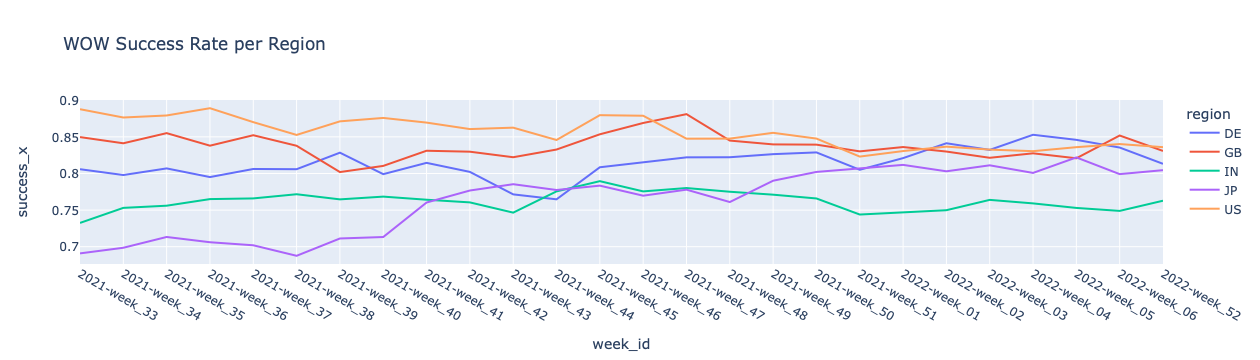

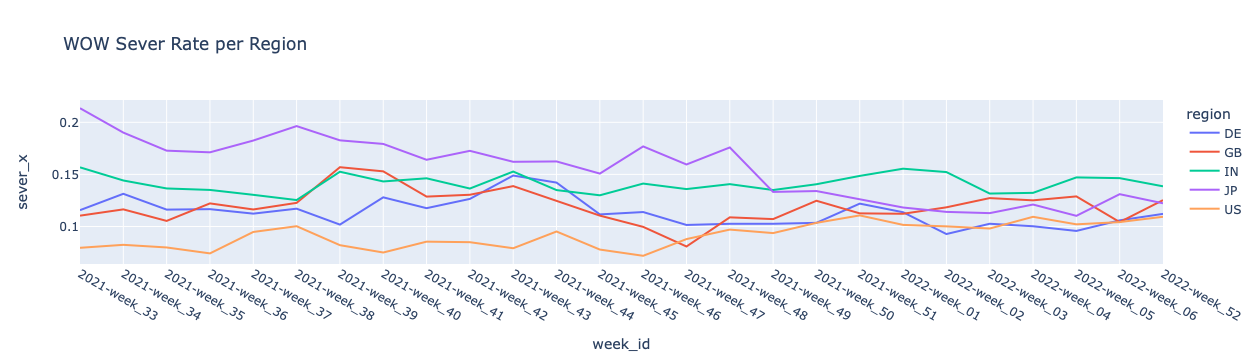

(None, None)

In [119]:
fig = px.line(table1, x="week_id", y="success_x", color="region", title = 'WOW Success Rate per Region')
fig1 = px.line(table1, x="week_id", y="sever_x", color="region", title = 'WOW Sever Rate per Region')
fig.show(), fig1.show()

# How to add both graphs the CI interval around the relevant points?

#### 23. Present WoW table/graph with success rate and CI (see image below) per region and rec type

In [104]:
df1 = df.groupby(['week_id', 'region', 'recommendation_type']).success.mean().reset_index()
df2 = df.groupby(['week_id', 'region', 'recommendation_type']).sever.mean().reset_index()
df3 = df.groupby(['week_id', 'region', 'recommendation_type']).success.apply(calc_ci).reset_index()
df4 = df.groupby(['week_id', 'region', 'recommendation_type']).sever.apply(calc_ci).reset_index()

table2 = df1.merge(df2, on =['week_id', 'region', 'recommendation_type']).merge(df3, on =['region', 'recommendation_type']).merge(df4, on =['region', 'recommendation_type'])
table2.sample(10)

,week_id_x,region,recommendation_type,success_x,sever_x,week_id_y,success_y,week_id,sever_y
21633,2021-week_39,DE,Yield,0.856322,0.072797,2021-week_33,"(1.5813250212205903, 0.0326380177937835)",2021-week_34,"(0.6648852088640366, -0.4778722218510495)"
65355,2021-week_51,GB,Yield,0.789116,0.131519,2021-week_50,"(1.5662039879518315, 0.0954274319877455)",2021-week_50,"(0.7700377820024323, -0.5223036430296227)"
102922,2022-week_04,IN,Yield,0.708832,0.179641,2021-week_39,"(1.5980846316870867, -0.20327943688189198)",2021-week_47,"(0.9744857057931777, -0.5823288430480797)"
133836,2022-week_03,JP,Yield,0.826923,0.064103,2021-week_43,"(1.5809505294527528, 0.04404947054724706)",2021-week_38,"(0.8526668976975966, -0.5513681963988952)"
109439,2021-week_39,JP,Qality,0.735726,0.191680,2021-week_42,"(1.5936004770327394, -0.04271406862827465)",2021-week_41,"(0.9071905833919398, -0.5666997858459275)"
4236,2021-week_39,DE,Qality,0.820690,0.109814,2021-week_39,"(1.5727686372125897, 0.06861067313223779)",2022-week_06,"(0.726675461566336, -0.5047762367601345)"
170267,2022-week_05,US,Yield,0.815982,0.108721,2021-week_49,"(1.5700223663570076, 0.07969514776728603)",2022-week_03,"(0.6837045310362009, -0.4861361419784502)"
102013,2022-week_02,IN,Yield,0.718287,0.192751,2022-week_05,"(1.6004871101966955, -0.15164469048048934)",2021-week_48,"(0.9403558632530217, -0.5749003603567605)"
7397,2021-week_43,DE,Qality,0.763263,0.155656,2022-week_06,"(1.5643231789326633, 0.10137449548594146)",2021-week_46,"(0.744909061497326, -0.5122516442081052)"
91767,2021-week_38,IN,Yield,0.728491,0.176305,2022-week_01,"(1.6001855756441188, -0.16420502459063413)",2021-week_46,"(0.9362043707998461, -0.5739241363832238)"


In [234]:
@widgets.interact
def show_fig2(rec_type = widgets.RadioButtons(options = ['Qality', 'Yield'], description='Select Recommendation Type: ')):
    df = table2.query('recommendation_type == @rec_type')
    return px.line(df, x = 'week_id_x', y = 'success_x', color = 'region', range_y = [0.5,1], title = f"WoW Success Rate Per region for {rec_type} Recommendation.")

interactive(children=(RadioButtons(description='Select Recommendation Type: ', options=('Qality', 'Yield'), va…

#### 24. Present WoW table/graph with success rate and CI (see image below) per region and rec provider

In [128]:
df1 = df.groupby(['week_id', 'region', 'rec_provider']).success.mean().reset_index()
df2 = df.groupby(['week_id', 'region', 'rec_provider']).success.apply(calc_ci).reset_index()

table3 = df1.merge(df2, on =['week_id', 'region', 'rec_provider'])
table3.head()

,week_id,region,rec_provider,success_x,success_y
0,2021-week_33,DE,BooksQ,0.838235,"(1.5653417221473935, 0.11112886608790051)"
1,2021-week_33,DE,BooksY,0.975000,"(1.284903210696501, 0.6650967893034989)"
2,2021-week_33,DE,DNNQ,0.827804,"(1.5680957455450621, 0.08751246930485879)"
3,2021-week_33,DE,DNNY,0.906593,"(1.478529523853843, 0.33465728933297034)"
4,2021-week_33,DE,ManualQ,0.865385,"(1.5408834255493236, 0.18988580521990728)"


In [223]:
@widgets.interact
def show_table_3_as_fig(rec_provider = widgets.RadioButtons(
    options=['DNNQ', 'DNNY', 'BooksQ', 'UserPopQ', 'UserPopY', 'RuleBasedY', 'ManualY', 'ManualQ', 'BooksY', 'XGBQ', 'XGBY', 'RNNQ', 'RNNY', 'RuleBased', 'UserPopSelectionQ', 'UserPopSelectionY'])):
    df = table3.query('rec_provider == @rec_provider')
    return px.line(data_frame = df,
                   x = 'week_id',
                   y = 'success_x',
                   color = 'region',
                   title = f'WoW Success Rate per region for {rec_provider} provider')
    

interactive(children=(RadioButtons(description='rec_provider', options=('DNNQ', 'DNNY', 'BooksQ', 'UserPopQ', …

#### 25. Which are the requester to which we succeed the most?

In [147]:
requester_success_rate = df.groupby('requester').success.mean().sort_values(ascending = False).rename('success_rate').reset_index()
requester_success_count = df.groupby('requester').success.count().sort_values(ascending = False).rename('successes').reset_index()
requester_success_count.merge(requester_success_rate, on = 'requester', how = 'outer')

,requester,successes,success_rate
0,Search Million Culture,86540,0.812699
1,RelayFoods,78502,0.806196
2,Extreme DA,57450,0.823603
3,Fancy,32346,0.881686
4,MoJoe Brewing Company,31210,0.814995
5,Puentes Company,29427,0.732898
6,Tab Solutions,13294,0.889800
7,iDreamsky Technology,11568,0.840249
8,SOLOMO365,5895,0.827820
9,LocalVox Media,5811,0.739976


**NOTE:** Marketo Japan, FlagTap, Cue, Derceto, and Altammune - all have success rate of 100%. Despite that, there are only a few observations for each of them...

#### 26. Which are the requester to which we produce the most critical defects?

In [148]:
df.groupby('requester').sever.mean().sort_values(ascending = False).index[0]

'PureSafe water systems'

In [149]:
df.groupby('requester').sever.mean().sort_values(ascending = False)

requester
PureSafe water systems          1.000000
Modanisa                        0.378869
Jun Group                       0.250000
Joules Clothing                 0.240000
Glory Medical                   0.184000
Cuiker                          0.181818
Puentes Company                 0.175349
LocalVox Media                  0.160213
OpenDesks, Inc.                 0.153285
Bizanga                         0.137264
RelayFoods                      0.126888
SOLOMO365                       0.122307
MoJoe Brewing Company           0.116277
Fry Multimedia                  0.115869
G-mode                          0.114690
VarVee                          0.113722
Pole Star                       0.111111
iDreamsky Technology            0.110045
Search Million Culture          0.108331
Extreme DA                      0.104247
aPriori Technologies            0.104027
Crescendo Networks              0.103983
Fancy                           0.096086
Sensor Tower                    0.090779
Allthe

In [156]:
df[df.requester == 'PureSafe water systems'].shape[0]

1

**Answer**: The requester *PureSafe water systems* has 100% sever rate, although it appears in the data set only onece. The next requeter having the highest sever rate is *Modanisa* (0.378869).

#### 27. What is the overall success rate trend over time? 

In [157]:
overall_suc_per_week = df.groupby('week_id').success.mean().reset_index()
overall_suc_per_week

,week_id,success
0,2021-week_33,0.809000
1,2021-week_34,0.808294
2,2021-week_35,0.816044
3,2021-week_36,0.814107
4,2021-week_37,0.813230
5,2021-week_38,0.805255
6,2021-week_39,0.807228
7,2021-week_40,0.806400
8,2021-week_41,0.816273
9,2021-week_42,0.812396


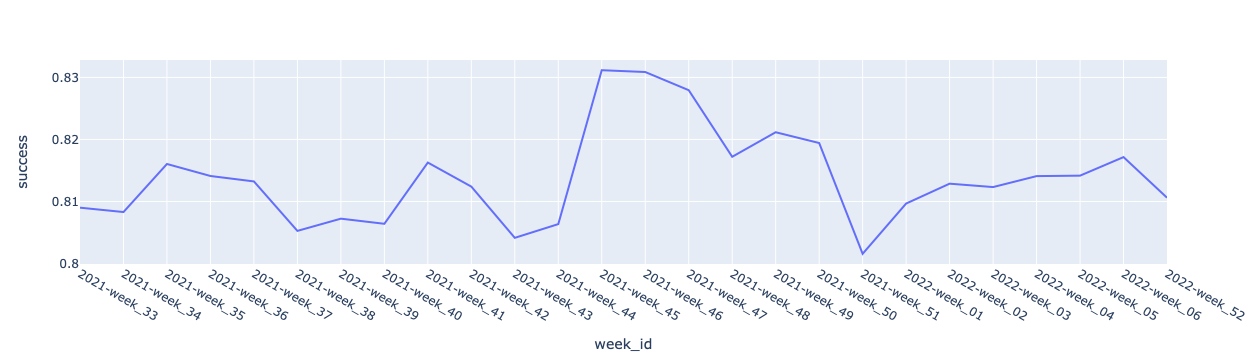

In [159]:
fig2 = px.line(overall_suc_per_week, x = 'week_id', y = 'success')
fig2.show()

#### 28. What is the overall sever defect rate trend over time?

In [160]:
overall_sever_per_week = df.groupby('week_id').sever.mean().reset_index()
overall_sever_per_week

,week_id,sever
0,2021-week_33,0.124617
1,2021-week_34,0.123791
2,2021-week_35,0.114451
3,2021-week_36,0.116261
4,2021-week_37,0.120345
5,2021-week_38,0.124277
6,2021-week_39,0.128815
7,2021-week_40,0.128002
8,2021-week_41,0.122601
9,2021-week_42,0.123122


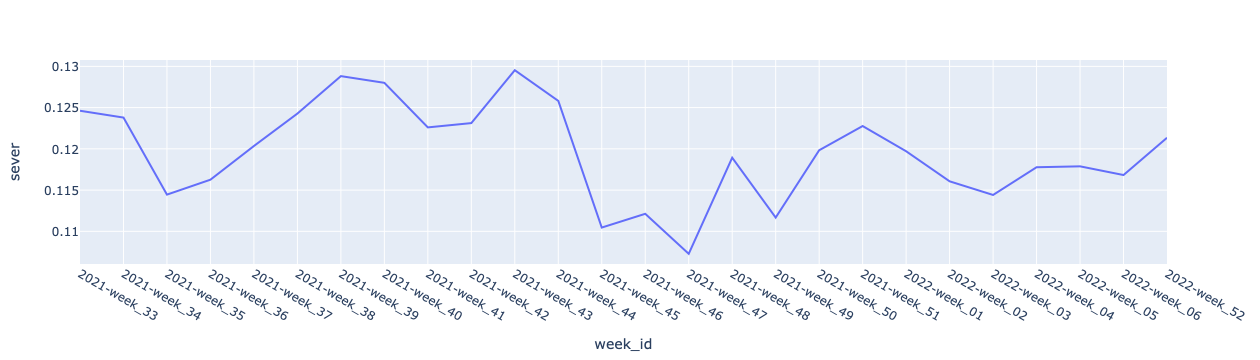

In [161]:
fig3 = px.line(overall_sever_per_week, x = 'week_id', y = 'sever')
fig3.show()

#### 29. Present a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:

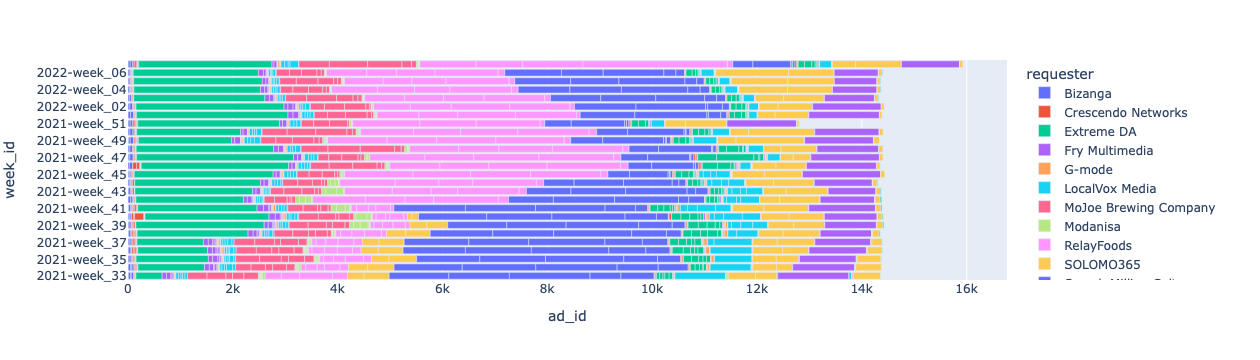

In [ ]:
df7 = df.groupby(['region', 'week_id', 'requester']).ad_id.size().reset_index()
fig4 = px.bar(df7, x = 'ad_id', y = 'week_id', color = 'requester')
fig4.show()
# The region is missing in the graph...

#### 30. Identify major traffic shape changes (addition/removal) of major clients

In [187]:
major_clients = df.requester.value_counts().head(6).index.to_list()
major_clients_sub = df.query('requester == @major_clients')
major_clients_info = major_clients_sub.groupby(['requester', 'week_id']).success.agg(['mean', 'count']).reset_index()
major_clients_info.head()

,requester,week_id,mean,count
0,Extreme DA,2021-week_33,0.831683,505
1,Extreme DA,2021-week_34,0.828638,1278
2,Extreme DA,2021-week_35,0.831884,1380
3,Extreme DA,2021-week_36,0.870218,1333
4,Extreme DA,2021-week_37,0.808025,1271


In [190]:
@widgets.interact
def show_fig30(requester = widgets.RadioButtons(options = ['Search Million Culture', 'RelayFoods', 'Extreme DA', 'Fancy', 'MoJoe Brewing Company', 'Puentes Company'])):
    df = major_clients_info.query('requester == @requester')
    return px.line(data_frame = df, x = 'week_id', y = 'count', title = f'Week over Week Tarffic for {requester}')

interactive(children=(RadioButtons(description='requester', options=('Search Million Culture', 'RelayFoods', '…

#### 31. Present a WoW graph showing the **requests proportion** per customer in each region

In [205]:
requester_prop_per_week_and_region_df = df.groupby(['week_id', 'region', 'requester']).ad_id.count() / df.groupby(['week_id', 'region']).ad_id.count()
requester_prop_per_week_and_region_df

week_id       region  requester           
2021-week_33  DE      Bizanga                 0.002923
                      Crescendo Networks      0.003758
                      Extreme DA              0.001670
                      Fry Multimedia          0.034238
                      G-mode                  0.004593
                                                ...   
2022-week_52  US      Sensor Tower            0.016758
                      Tab Solutions           0.055778
                      VarVee                  0.000500
                      aPriori Technologies    0.000500
                      iDreamsky Technology    0.005753
Name: ad_id, Length: 2069, dtype: float64

#### 32. Identify major traffic shape changes (addition/removal) of major clients

See answer 

**Analysis Bonus questions:**
Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [ ]:
import os
weekly_files = os.listdir('data/weekly/')
sorted_weekly_files = sorted(weekly_files)[:10]

In [ ]:
files_name = os.listdir('data/weekly/')
files_name = sorted(files_name)[1:]

In [ ]:
def load_csv_files(lst):
    dataframes_list = []
    for file in range(len(lst)):
        temp_df = pd.read_csv("data/weekly/"+lst[i])
        temp_df['week_id'] = lst[i][:4]+'-week'+ lst[i][4:7]
        
        dataframes_list.append(temp_df)
    return dataframes_list

dfs_list = load_csv_files(files_name)

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

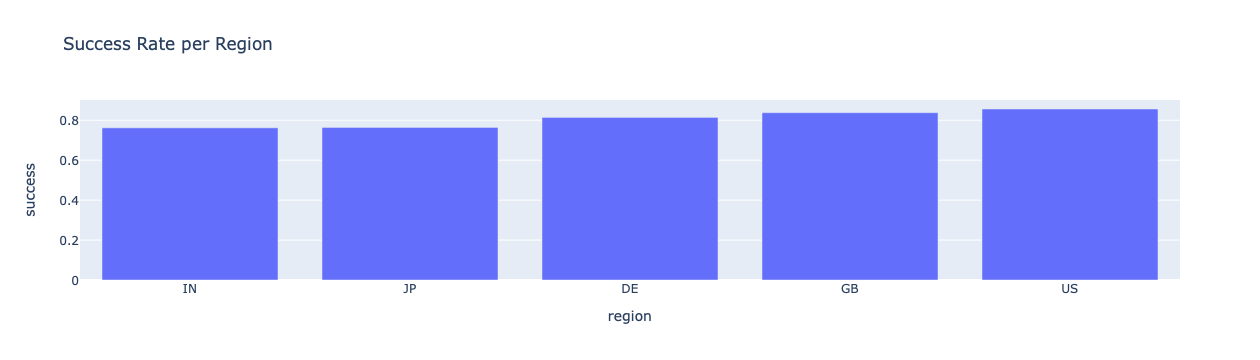

In [211]:
df23 = df.groupby('region').success.mean().reset_index().sort_values(by = 'success')
fig6 = px.bar(df23, x = 'region', y = 'success', title = 'Success Rate per Region')
fig6.show()

Produce the following requestser proportion graph:

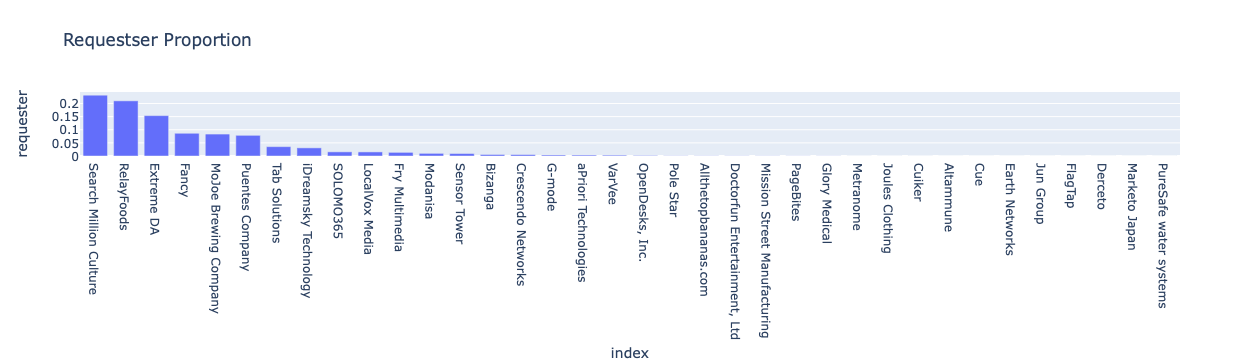

In [213]:
df24 = df.requester.value_counts(normalize = True).rename('requester_prop').reset_index()

fig7 = px.bar(df24, x = 'index', y = 'requester', title = 'Requestser Proportion', hover_data = ')
fig7.show()

## Appendix

Code to create weekly files:

In [ ]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)